# Домашнее задание к лекции «Продвинутая линейная алгебра»

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Уровень 0:
###### Придумайте матрицы, которые обладают следующими свойствами:

######  a) Диагональная, ортогональная, но не единичная(!)

In [122]:
A = np.array([[-1, 0], [0, -1]])

A

array([[-1,  0],
       [ 0, -1]])

In [123]:
AT = A.transpose()
A.dot(AT)

array([[1, 0],
       [0, 1]])

######  b) Верхнетреугольная, ортогональная

######  c) Нижнетреугольная, ортогональная

Если я правильно понимаю, единичная матрица также является одновременно и верхнеугольной и нижнеугольной. Соответственно является решением для обоих заданий b и c


In [124]:
B = np.eye(3)

B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [125]:
BT = B.transpose()
B.dot(BT)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

######  d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [126]:
C = np.array([[5, 1], [4, 1]])

C

array([[5, 1],
       [4, 1]])

In [127]:
np.linalg.det(B)

1.0

###### Найдите собственные значения и собственные вектора матриц:

In [128]:
m = np.array([[2, 2],
              [1, 3]])
m

array([[2, 2],
       [1, 3]])

In [129]:
w, v = np.linalg.eig(m)

In [130]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


#### Уровень 1:
###### Найдите спектральное разложение матрицы:

In [131]:
m = np.array([[1, 2],
              [2, 3]])

m

array([[1, 2],
       [2, 3]])

In [132]:
a, U = np.linalg.eig(m)
print('Eigen Values:')
print(np.array(a, dtype=float))
print('\nEigen Vectors:')
print(U)

Eigen Values:
[-0.23606798  4.23606798]

Eigen Vectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [133]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


###### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [134]:
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [135]:
digits = load_digits()
X = digits.data

X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [136]:
max_component = 64
result = []

In [137]:
for i in range(1, max_component):
    pca = PCA(n_components=(i))
    
    X_transform = pca.fit_transform(digits.data)

    X_inverse = pca.inverse_transform(X_transform)
    
    result.append(mean_squared_error(X, X_inverse))

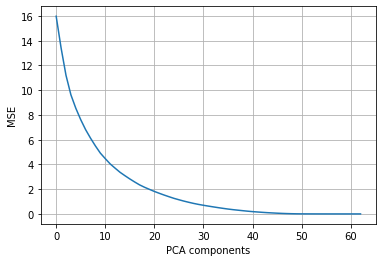

In [138]:
fig, ax = plt.subplots()

ax.plot(result)
ax.grid()


ax.set_xlabel('PCA components')
ax.set_ylabel('MSE')

plt.show()